In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

In [3]:
iris= pd.read_csv('iris.csv')

In [4]:
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 6)

In [6]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
iris.drop(columns="Id", inplace=True)
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

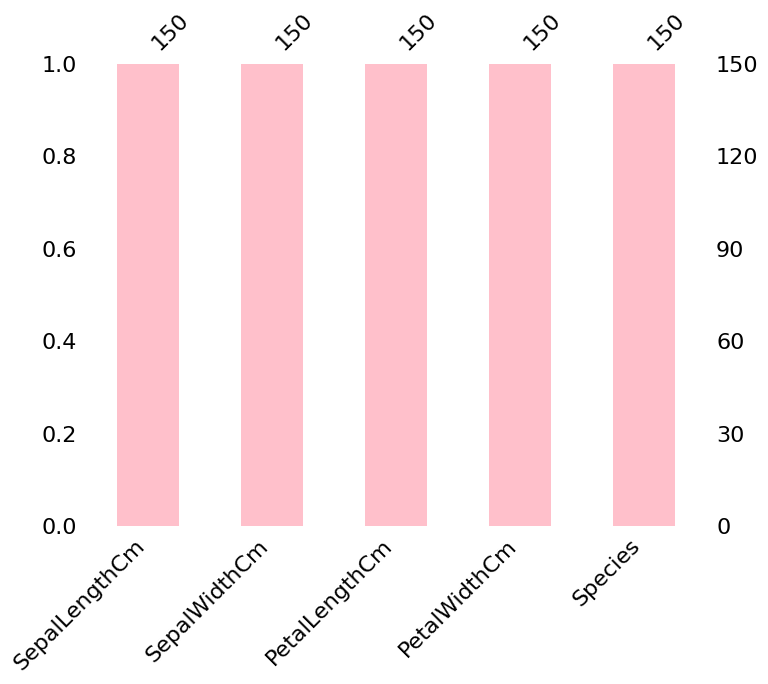

In [9]:
import missingno as msno
msno.bar(iris, figsize =(8,6), color="pink")
plt.show()

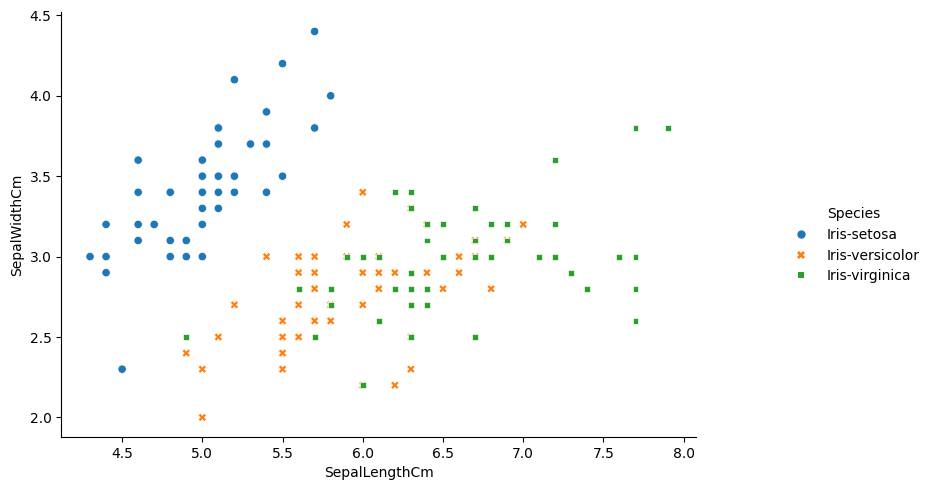

In [10]:
g=sns.relplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', style='Species')
g.fig.set_size_inches(10,5)
plt.show()

In [11]:
numeric_columns = iris.select_dtypes(include=[float, int]).columns
iris_numeric = iris[numeric_columns]
correlation_matrix = iris_numeric.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


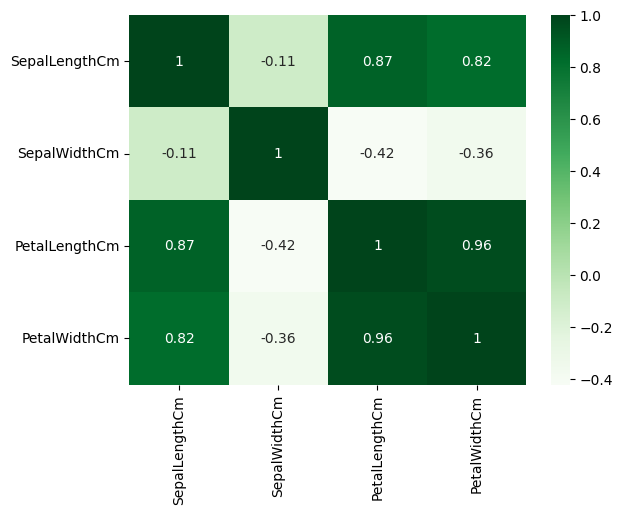

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.show()

In [18]:
x=iris.drop('Species', axis=1)
y= iris['Species']

In [19]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y= le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
print('The shape of x_train is :{}'. format(x_train.shape))
print('The shape of x_test is :{}'. format(x_test.shape))
print('The shape of y_train is :{}'. format(y_train.shape))
print('The shape of y_test is :{}'. format(y_test.shape))

The shape of x_train is :(120, 4)
The shape of x_test is :(30, 4)
The shape of y_train is :(120,)
The shape of y_test is :(30,)


In [27]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred_train = model.predict(x_train)
cm = confusion_matrix(y_train, pred_train)
print('confusion matrix Decision Tree\n',cm)
print('')

print('Akurasi pada saat training:{}'. format(accuracy_score(y_train,pred_train)))

confusion matrix Decision Tree
 [[39  0  0]
 [ 0 37  0]
 [ 0  0 44]]

Akurasi pada saat training:1.0


In [31]:
pred_test= model.predict(x_test)
cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test,pred_test)
precision = precision_score(y_test,pred_test, average='micro')
recall = recall_score(y_test,pred_test, average='micro')
f1 = f1_score(y_test,pred_test, average='micro')
print('confusion matrix DecisionTree\n',cm)
print('')

print('Akurasi pada test: %.3f' %accuracy)
print('recall: %.3f' %recall)
print('precision: %.3f' %precision)
print('f1: %.3f' %f1)

confusion matrix DecisionTree
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Akurasi pada test: 1.000
recall: 1.000
precision: 1.000
f1: 1.000
